# DLCV Assignment 2


<b>Name:</b>  Raja Sekhar M <br>
<b>SR No:</b> 6000014806

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import sys
sys.path.append('/kaggle/input/dlcv-a2')

import engine
from model import ViT
#from utils import plot_learning_curves, plot_learning_curves_vs_hparam
import utils

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 59.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Experiment 1

Implementing ViT and training it on CIFAR10 dataset.

In [3]:
model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = torch.nn.CrossEntropyLoss()
results = engine.train(model=model,
             train_dataloader=trainloader,
             test_dataloader=testloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device,
             epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8523 | train_acc: 0.3204 | test_loss: 1.5648 | test_acc: 0.4389
Epoch:  2 | train_loss: 1.5638 | train_acc: 0.4361 | test_loss: 1.4425 | test_acc: 0.4807
Epoch:  3 | train_loss: 1.4526 | train_acc: 0.4781 | test_loss: 1.4068 | test_acc: 0.5015
Epoch:  4 | train_loss: 1.3686 | train_acc: 0.5053 | test_loss: 1.3019 | test_acc: 0.5302
Epoch:  5 | train_loss: 1.3078 | train_acc: 0.5295 | test_loss: 1.2848 | test_acc: 0.5338
Epoch:  6 | train_loss: 1.2569 | train_acc: 0.5484 | test_loss: 1.2326 | test_acc: 0.5565
Epoch:  7 | train_loss: 1.2115 | train_acc: 0.5666 | test_loss: 1.2041 | test_acc: 0.5700
Epoch:  8 | train_loss: 1.1750 | train_acc: 0.5796 | test_loss: 1.1724 | test_acc: 0.5800
Epoch:  9 | train_loss: 1.1384 | train_acc: 0.5912 | test_loss: 1.1528 | test_acc: 0.5882
Epoch: 10 | train_loss: 1.1058 | train_acc: 0.6026 | test_loss: 1.1381 | test_acc: 0.5887


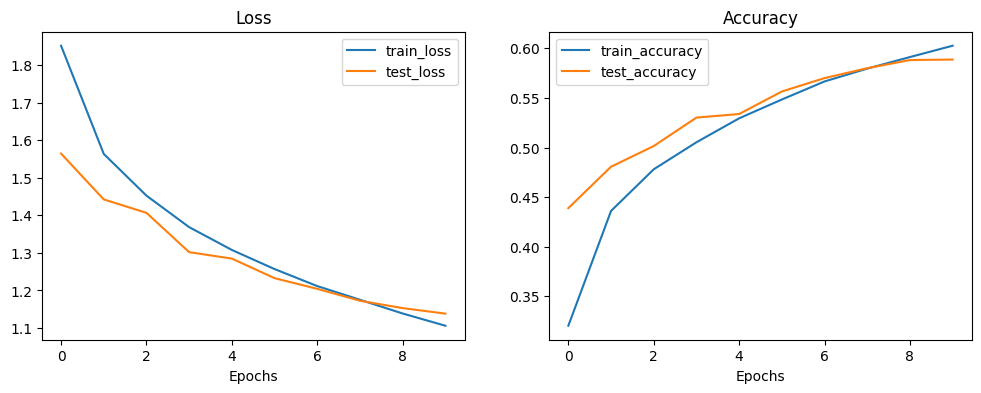

In [4]:
utils.plot_learning_curves(results)

In [5]:
torch.save(model.state_dict(), 'vit_exp1.pth')

## Experiment 2

Training the model at different data sizes 5%, 10%, 25%, 50% and 100% of the 
training dataset.

In [6]:
import torch

trainset_5percent = torch.utils.data.Subset(trainset, range(int(0.05 * len(trainset))))
trainset_10percent = torch.utils.data.Subset(trainset, range(int(0.10 * len(trainset))))
trainset_25percent = torch.utils.data.Subset(trainset, range(int(0.25 * len(trainset))))
trainset_50percent = torch.utils.data.Subset(trainset, range(int(0.50 * len(trainset))))


trainloader_5percent = torch.utils.data.DataLoader(trainset_5percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_10percent = torch.utils.data.DataLoader(trainset_10percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_25percent = torch.utils.data.DataLoader(trainset_25percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_50percent = torch.utils.data.DataLoader(trainset_50percent, batch_size=4, shuffle=True, num_workers=2)

In [7]:
results_vs_datasize = {'5%_data': None, '10%_data': None, '25%_data': None, '50%_data': None, '100%_data': None}

data_sizes = ['5%_data', '10%_data', '25%_data', '50%_data', '100%_data']
trainloaders = [trainloader_5percent, trainloader_10percent, trainloader_25percent, trainloader_50percent, trainloader]

loss_fn = torch.nn.CrossEntropyLoss()

for i in range(len(data_sizes)):
    data_size = data_sizes[i]
    trainloader = trainloaders[i]
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_datasize[data_size] = results


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.2275 | train_acc: 0.1584 | test_loss: 2.1162 | test_acc: 0.1867
Epoch:  2 | train_loss: 2.1287 | train_acc: 0.1928 | test_loss: 2.0922 | test_acc: 0.1964
Epoch:  3 | train_loss: 2.0899 | train_acc: 0.2032 | test_loss: 2.0769 | test_acc: 0.2103
Epoch:  4 | train_loss: 2.0052 | train_acc: 0.2528 | test_loss: 1.9314 | test_acc: 0.2789
Epoch:  5 | train_loss: 1.9540 | train_acc: 0.2728 | test_loss: 1.9267 | test_acc: 0.2942
Epoch:  6 | train_loss: 1.9160 | train_acc: 0.2968 | test_loss: 1.8827 | test_acc: 0.2910
Epoch:  7 | train_loss: 1.8659 | train_acc: 0.3152 | test_loss: 1.8514 | test_acc: 0.3275
Epoch:  8 | train_loss: 1.8304 | train_acc: 0.3356 | test_loss: 1.8092 | test_acc: 0.3389
Epoch:  9 | train_loss: 1.7759 | train_acc: 0.3536 | test_loss: 1.8358 | test_acc: 0.3376
Epoch: 10 | train_loss: 1.7376 | train_acc: 0.3832 | test_loss: 1.7767 | test_acc: 0.3604


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.1725 | train_acc: 0.1782 | test_loss: 2.0979 | test_acc: 0.2010
Epoch:  2 | train_loss: 2.0420 | train_acc: 0.2342 | test_loss: 1.9702 | test_acc: 0.2426
Epoch:  3 | train_loss: 1.9240 | train_acc: 0.3006 | test_loss: 1.8543 | test_acc: 0.3179
Epoch:  4 | train_loss: 1.8523 | train_acc: 0.3192 | test_loss: 1.8328 | test_acc: 0.3408
Epoch:  5 | train_loss: 1.7959 | train_acc: 0.3478 | test_loss: 1.8790 | test_acc: 0.3287
Epoch:  6 | train_loss: 1.7432 | train_acc: 0.3702 | test_loss: 1.7269 | test_acc: 0.3725
Epoch:  7 | train_loss: 1.6959 | train_acc: 0.3852 | test_loss: 1.6821 | test_acc: 0.3918
Epoch:  8 | train_loss: 1.6540 | train_acc: 0.4036 | test_loss: 1.6440 | test_acc: 0.4069
Epoch:  9 | train_loss: 1.5979 | train_acc: 0.4286 | test_loss: 1.7122 | test_acc: 0.4015
Epoch: 10 | train_loss: 1.5688 | train_acc: 0.4388 | test_loss: 1.6114 | test_acc: 0.4189


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 2.0915 | train_acc: 0.2106 | test_loss: 1.9132 | test_acc: 0.3023
Epoch:  2 | train_loss: 1.8764 | train_acc: 0.3173 | test_loss: 1.8124 | test_acc: 0.3438
Epoch:  3 | train_loss: 1.7695 | train_acc: 0.3632 | test_loss: 1.7317 | test_acc: 0.3844
Epoch:  4 | train_loss: 1.6760 | train_acc: 0.3946 | test_loss: 1.6043 | test_acc: 0.4343
Epoch:  5 | train_loss: 1.5984 | train_acc: 0.4206 | test_loss: 1.6121 | test_acc: 0.4079
Epoch:  6 | train_loss: 1.5471 | train_acc: 0.4410 | test_loss: 1.5190 | test_acc: 0.4550
Epoch:  7 | train_loss: 1.4948 | train_acc: 0.4605 | test_loss: 1.5175 | test_acc: 0.4557
Epoch:  8 | train_loss: 1.4575 | train_acc: 0.4806 | test_loss: 1.4923 | test_acc: 0.4654
Epoch:  9 | train_loss: 1.4260 | train_acc: 0.4866 | test_loss: 1.4957 | test_acc: 0.4647
Epoch: 10 | train_loss: 1.3828 | train_acc: 0.5048 | test_loss: 1.4749 | test_acc: 0.4702


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.9669 | train_acc: 0.2695 | test_loss: 1.7487 | test_acc: 0.3726
Epoch:  2 | train_loss: 1.7276 | train_acc: 0.3784 | test_loss: 1.6006 | test_acc: 0.4244
Epoch:  3 | train_loss: 1.6029 | train_acc: 0.4244 | test_loss: 1.5219 | test_acc: 0.4559
Epoch:  4 | train_loss: 1.5276 | train_acc: 0.4460 | test_loss: 1.4718 | test_acc: 0.4737
Epoch:  5 | train_loss: 1.4705 | train_acc: 0.4714 | test_loss: 1.5034 | test_acc: 0.4658
Epoch:  6 | train_loss: 1.4190 | train_acc: 0.4865 | test_loss: 1.4305 | test_acc: 0.4854
Epoch:  7 | train_loss: 1.3780 | train_acc: 0.5002 | test_loss: 1.3755 | test_acc: 0.5064
Epoch:  8 | train_loss: 1.3326 | train_acc: 0.5185 | test_loss: 1.3722 | test_acc: 0.5004
Epoch:  9 | train_loss: 1.2961 | train_acc: 0.5331 | test_loss: 1.3410 | test_acc: 0.5189
Epoch: 10 | train_loss: 1.2612 | train_acc: 0.5456 | test_loss: 1.3233 | test_acc: 0.5225


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8640 | train_acc: 0.3172 | test_loss: 1.6166 | test_acc: 0.4219
Epoch:  2 | train_loss: 1.5713 | train_acc: 0.4332 | test_loss: 1.4798 | test_acc: 0.4619
Epoch:  3 | train_loss: 1.4541 | train_acc: 0.4763 | test_loss: 1.3508 | test_acc: 0.5153
Epoch:  4 | train_loss: 1.3719 | train_acc: 0.5075 | test_loss: 1.3259 | test_acc: 0.5183
Epoch:  5 | train_loss: 1.3113 | train_acc: 0.5290 | test_loss: 1.2721 | test_acc: 0.5466
Epoch:  6 | train_loss: 1.2589 | train_acc: 0.5494 | test_loss: 1.2452 | test_acc: 0.5568
Epoch:  7 | train_loss: 1.2104 | train_acc: 0.5655 | test_loss: 1.2002 | test_acc: 0.5684
Epoch:  8 | train_loss: 1.1735 | train_acc: 0.5805 | test_loss: 1.1736 | test_acc: 0.5744
Epoch:  9 | train_loss: 1.1372 | train_acc: 0.5928 | test_loss: 1.1826 | test_acc: 0.5807
Epoch: 10 | train_loss: 1.1028 | train_acc: 0.6037 | test_loss: 1.1377 | test_acc: 0.5942


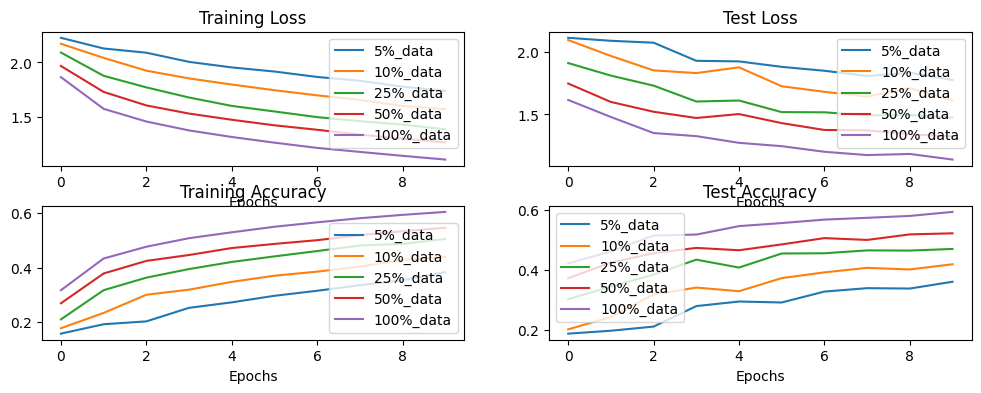

In [8]:
utils.plot_learning_curves_vs_hparam(results_vs_datasize)

## Experiment 3

Training the model with different patch sizes - 4x4, 8x8, and 16x16.

In [9]:
results_vs_patch_size = {'p_size=4': None, 'p_size=8': None, 'p_size=16': None}

loss_fn = torch.nn.CrossEntropyLoss()

for patch_size in ['4', '8', '16']:
    model = ViT(
        img_size=32,
        patch_size=int(patch_size),
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_patch_size[f'p_size={patch_size}'] = results

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8523 | train_acc: 0.3239 | test_loss: 1.5780 | test_acc: 0.4313
Epoch:  2 | train_loss: 1.5757 | train_acc: 0.4303 | test_loss: 1.5182 | test_acc: 0.4571
Epoch:  3 | train_loss: 1.4652 | train_acc: 0.4728 | test_loss: 1.4002 | test_acc: 0.4938
Epoch:  4 | train_loss: 1.3837 | train_acc: 0.5002 | test_loss: 1.3162 | test_acc: 0.5240
Epoch:  5 | train_loss: 1.3208 | train_acc: 0.5239 | test_loss: 1.3237 | test_acc: 0.5279
Epoch:  6 | train_loss: 1.2680 | train_acc: 0.5427 | test_loss: 1.2395 | test_acc: 0.5589
Epoch:  7 | train_loss: 1.2190 | train_acc: 0.5641 | test_loss: 1.2074 | test_acc: 0.5661
Epoch:  8 | train_loss: 1.1771 | train_acc: 0.5799 | test_loss: 1.1903 | test_acc: 0.5780
Epoch:  9 | train_loss: 1.1443 | train_acc: 0.5915 | test_loss: 1.1923 | test_acc: 0.5796
Epoch: 10 | train_loss: 1.1102 | train_acc: 0.6011 | test_loss: 1.1568 | test_acc: 0.5938


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.7646 | train_acc: 0.3591 | test_loss: 1.5008 | test_acc: 0.4531
Epoch:  2 | train_loss: 1.4912 | train_acc: 0.4602 | test_loss: 1.4230 | test_acc: 0.4938
Epoch:  3 | train_loss: 1.3926 | train_acc: 0.4992 | test_loss: 1.3266 | test_acc: 0.5248
Epoch:  4 | train_loss: 1.3291 | train_acc: 0.5238 | test_loss: 1.2851 | test_acc: 0.5389
Epoch:  5 | train_loss: 1.2799 | train_acc: 0.5410 | test_loss: 1.2705 | test_acc: 0.5402
Epoch:  6 | train_loss: 1.2393 | train_acc: 0.5541 | test_loss: 1.2630 | test_acc: 0.5479
Epoch:  7 | train_loss: 1.2043 | train_acc: 0.5678 | test_loss: 1.2401 | test_acc: 0.5528
Epoch:  8 | train_loss: 1.1719 | train_acc: 0.5783 | test_loss: 1.2017 | test_acc: 0.5699
Epoch:  9 | train_loss: 1.1403 | train_acc: 0.5922 | test_loss: 1.2019 | test_acc: 0.5740
Epoch: 10 | train_loss: 1.1097 | train_acc: 0.6019 | test_loss: 1.1883 | test_acc: 0.5807


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.7949 | train_acc: 0.3468 | test_loss: 1.6182 | test_acc: 0.4158
Epoch:  2 | train_loss: 1.5915 | train_acc: 0.4262 | test_loss: 1.5497 | test_acc: 0.4450
Epoch:  3 | train_loss: 1.5010 | train_acc: 0.4590 | test_loss: 1.4649 | test_acc: 0.4715
Epoch:  4 | train_loss: 1.4426 | train_acc: 0.4790 | test_loss: 1.4121 | test_acc: 0.4896
Epoch:  5 | train_loss: 1.3912 | train_acc: 0.5002 | test_loss: 1.3951 | test_acc: 0.5046
Epoch:  6 | train_loss: 1.3506 | train_acc: 0.5157 | test_loss: 1.3470 | test_acc: 0.5183
Epoch:  7 | train_loss: 1.3096 | train_acc: 0.5294 | test_loss: 1.3400 | test_acc: 0.5166
Epoch:  8 | train_loss: 1.2781 | train_acc: 0.5421 | test_loss: 1.3381 | test_acc: 0.5244
Epoch:  9 | train_loss: 1.2459 | train_acc: 0.5519 | test_loss: 1.3198 | test_acc: 0.5301
Epoch: 10 | train_loss: 1.2149 | train_acc: 0.5644 | test_loss: 1.2877 | test_acc: 0.5443


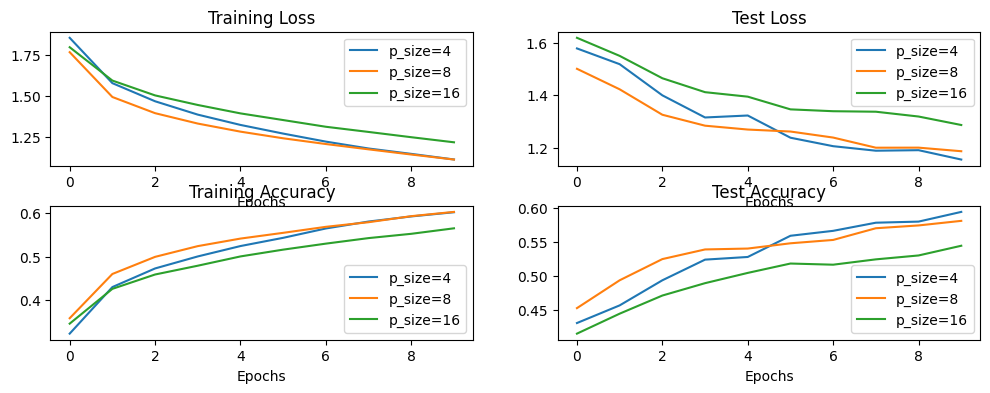

In [10]:
utils.plot_learning_curves_vs_hparam(results_vs_patch_size)

## Experiment 4

Training the model with different number of attention heads - 4, 8, and 12.

In [11]:
results_vs_num_heads = {'n_heads=4': None, 'n_heads=8': None, 'n_heads=12': None}

loss_fn = torch.nn.CrossEntropyLoss()

for num_heads in ['4', '8', '12']:
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=96,
        num_heads=int(num_heads),
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_num_heads[f'n_heads={num_heads}'] = results

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8216 | train_acc: 0.3364 | test_loss: 1.6098 | test_acc: 0.4158
Epoch:  2 | train_loss: 1.5623 | train_acc: 0.4374 | test_loss: 1.4264 | test_acc: 0.4875
Epoch:  3 | train_loss: 1.4612 | train_acc: 0.4732 | test_loss: 1.4172 | test_acc: 0.4920
Epoch:  4 | train_loss: 1.3824 | train_acc: 0.5014 | test_loss: 1.3354 | test_acc: 0.5168
Epoch:  5 | train_loss: 1.3180 | train_acc: 0.5253 | test_loss: 1.2936 | test_acc: 0.5311
Epoch:  6 | train_loss: 1.2641 | train_acc: 0.5443 | test_loss: 1.2579 | test_acc: 0.5497
Epoch:  7 | train_loss: 1.2154 | train_acc: 0.5625 | test_loss: 1.2177 | test_acc: 0.5663
Epoch:  8 | train_loss: 1.1772 | train_acc: 0.5741 | test_loss: 1.2119 | test_acc: 0.5626
Epoch:  9 | train_loss: 1.1417 | train_acc: 0.5858 | test_loss: 1.1929 | test_acc: 0.5772
Epoch: 10 | train_loss: 1.1053 | train_acc: 0.6052 | test_loss: 1.1519 | test_acc: 0.5824


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.8078 | train_acc: 0.3397 | test_loss: 1.5409 | test_acc: 0.4526
Epoch:  2 | train_loss: 1.5284 | train_acc: 0.4480 | test_loss: 1.4399 | test_acc: 0.4865
Epoch:  3 | train_loss: 1.4081 | train_acc: 0.4915 | test_loss: 1.3279 | test_acc: 0.5249
Epoch:  4 | train_loss: 1.3238 | train_acc: 0.5224 | test_loss: 1.2850 | test_acc: 0.5352
Epoch:  5 | train_loss: 1.2577 | train_acc: 0.5472 | test_loss: 1.2262 | test_acc: 0.5598
Epoch:  6 | train_loss: 1.2057 | train_acc: 0.5650 | test_loss: 1.1788 | test_acc: 0.5756
Epoch:  7 | train_loss: 1.1652 | train_acc: 0.5811 | test_loss: 1.1673 | test_acc: 0.5813
Epoch:  8 | train_loss: 1.1223 | train_acc: 0.5984 | test_loss: 1.1430 | test_acc: 0.5868
Epoch:  9 | train_loss: 1.0832 | train_acc: 0.6122 | test_loss: 1.1644 | test_acc: 0.5902
Epoch: 10 | train_loss: 1.0504 | train_acc: 0.6245 | test_loss: 1.1122 | test_acc: 0.6005


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  1 | train_loss: 1.7953 | train_acc: 0.3429 | test_loss: 1.5582 | test_acc: 0.4367
Epoch:  2 | train_loss: 1.4927 | train_acc: 0.4622 | test_loss: 1.3953 | test_acc: 0.4885
Epoch:  3 | train_loss: 1.3687 | train_acc: 0.5052 | test_loss: 1.3063 | test_acc: 0.5275
Epoch:  4 | train_loss: 1.2875 | train_acc: 0.5351 | test_loss: 1.2825 | test_acc: 0.5434
Epoch:  5 | train_loss: 1.2208 | train_acc: 0.5610 | test_loss: 1.2251 | test_acc: 0.5576
Epoch:  6 | train_loss: 1.1652 | train_acc: 0.5800 | test_loss: 1.1815 | test_acc: 0.5772
Epoch:  7 | train_loss: 1.1196 | train_acc: 0.6001 | test_loss: 1.1633 | test_acc: 0.5825
Epoch:  8 | train_loss: 1.0733 | train_acc: 0.6143 | test_loss: 1.1553 | test_acc: 0.5902
Epoch:  9 | train_loss: 1.0350 | train_acc: 0.6295 | test_loss: 1.1117 | test_acc: 0.6063
Epoch: 10 | train_loss: 1.0015 | train_acc: 0.6391 | test_loss: 1.1122 | test_acc: 0.6072


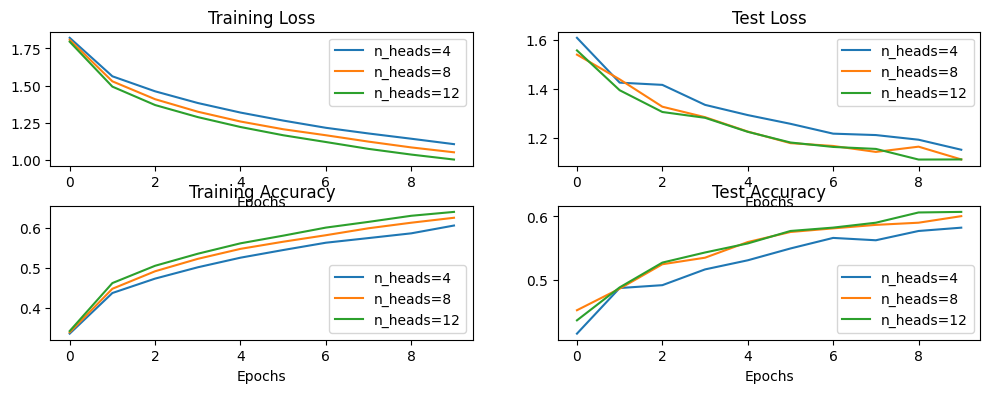

In [12]:
utils.plot_learning_curves_vs_hparam(results_vs_num_heads)

## Experiment 5

Performing classification using CLS token from different transformer layers.

In [13]:
import random

trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
).to(device)
device = "cuda" if torch.cuda.is_available() else "cpu"
if device=='cuda':
    trained_model.load_state_dict(torch.load('vit_exp1.pth'))
elif device=='cpu':
    trained_model.load_state_dict(torch.load('vit_exp1.pth',
                                            map_location=torch.device('cpu')
                                            )
                                  )

def classify_with_CLS_l(model, img, l):
    '''Classifies an image using the CLS token of the l-th transformer layer'''
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    model.eval()
    model(img.to(device))
    x = model.transformer_encoder[l].CLS
    out = model.classifier(x)
    out_class = torch.argmax(out).item()
    return out_class

samples = torch.utils.data.Subset(testset, random.sample(range(len(testset)), 10))
predictions_vs_layers = {}
for i in range(len(samples)):
    img = samples[i][0].unsqueeze(0)
    gt = samples[i][1]
    #print('Ground truth: ', gt)
    preds_for_img = []
    for l in range(6):
        out_class = classify_with_CLS_l(trained_model, img, l)
        #print(f'using layer {l} CLS token: ',out_class)
        preds_for_img.append(out_class)
    predictions_vs_layers[i] = preds_for_img

<ipython-input-13-024494192cee>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load('vit_exp1.pth'))


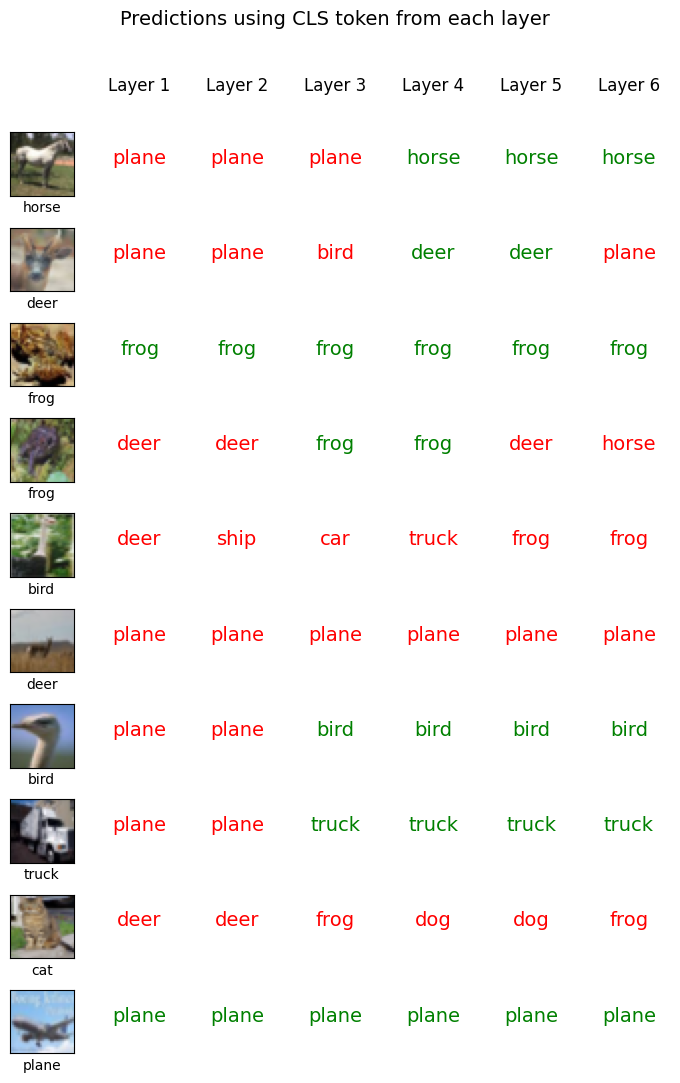

In [14]:
utils.plot_predictions_vs_layers(samples, predictions_vs_layers)

## Experiment 6

Two randomly chosen test images per class (total of 20 images) are classified and attention maps are visualized.

In [ ]:
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np

In [16]:
trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)

if device=='cuda':
    trained_model.load_state_dict(torch.load('vit_exp1.pth'))
elif device=='cpu':
    trained_model.load_state_dict(torch.load('vit_exp1.pth',
                                            map_location=torch.device('cpu')
                                            )
                                  )

<ipython-input-16-381e2a5decf1>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load('vit_exp1.pth'))


In [17]:
summary(model=trained_model,
         input_size=(1, 3, 32, 32), # (batch_size, color_channels, height, width)
         col_names=["input_size"], # uncomment for smaller output
         #col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape
ViT (ViT)                                                    [1, 3, 32, 32]
├─PatchEmbedding (patch_embedding)                           [1, 3, 32, 32]
│    └─Conv2d (patcher)                                      [1, 3, 32, 32]
│    └─Flatten (flatten)                                     [1, 64, 8, 8]
├─Dropout (embedding_dropout)                                [1, 65, 64]
├─Sequential (transformer_encoder)                           [1, 65, 64]
│    └─TransformerEncoderBlock (0)                           [1, 65, 64]
│    │    └─MultiheadSelfAttentionBlock (msa_block)          [1, 65, 64]
│    │    └─MLPBlock (mlp_block)                             [1, 65, 64]
│    └─TransformerEncoderBlock (1)                           [1, 65, 64]
│    │    └─MultiheadSelfAttentionBlock (msa_block)          [1, 65, 64]
│    │    └─MLPBlock (mlp_block)                             [1, 65, 64]
│    └─TransformerEncoderBlock (2)      

10


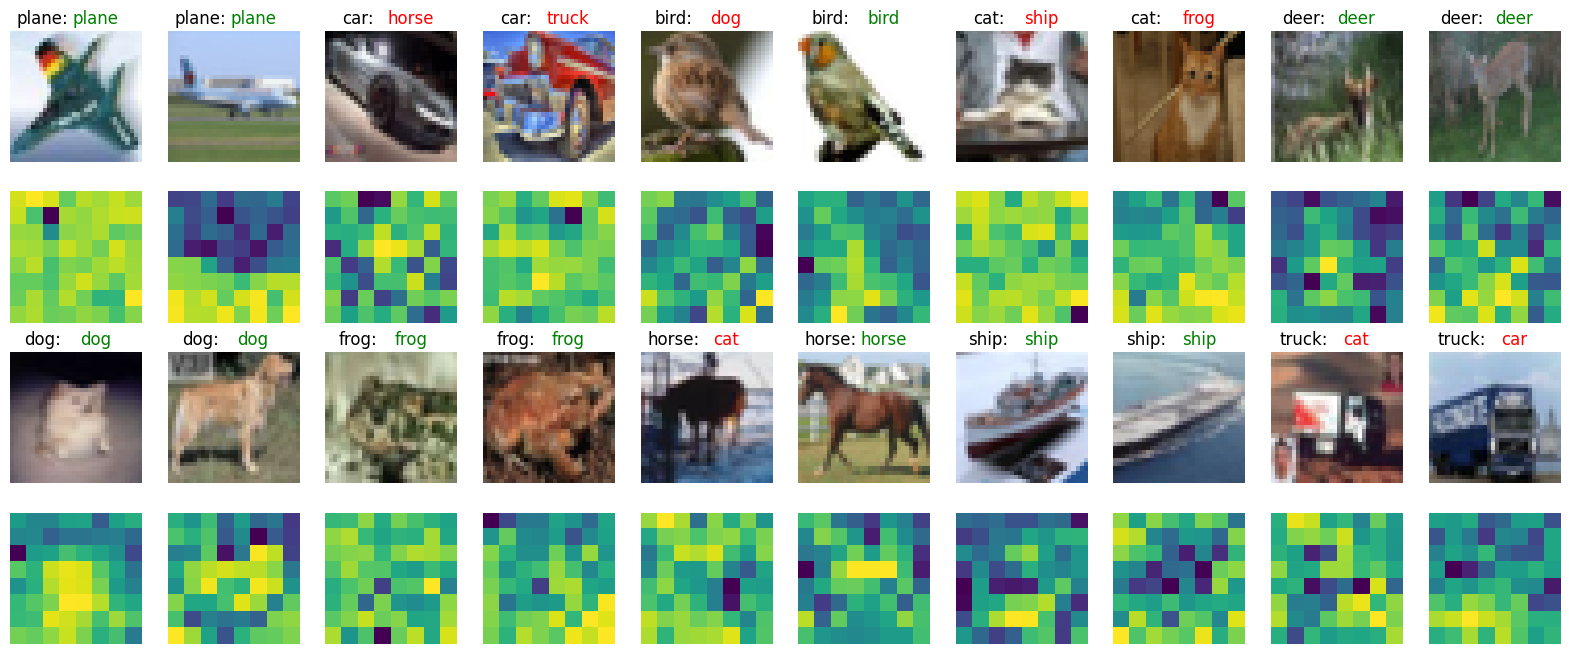

In [18]:
import numpy as np
import matplotlib.pyplot as plt

samples = utils.get_2_samples_per_class(testset)
N = len(samples)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
trained_model.to(device)
fig = plt.figure(figsize=(20,8))
rows = 4
cols = N//2
print(cols)
for i in range(N):
    img, gt_lbl = samples[i]
    attentions, pred_lbl = utils.get_attentions(trained_model, img)
    
    rollout = utils.attention_rollout(attentions)
    cls_attn = rollout[0, 1:, 0]
    cls_attn_map = 1-cls_attn.reshape((8,8))
    
    color = 'green' if gt_lbl==pred_lbl else 'red'
    if i< cols:
        img_pos = i+1
        map_pos = i+1+cols
    else:
        img_pos = i+1+cols
        map_pos =i+1+2*cols
    plt.subplot(rows,cols,img_pos)
    plt.imshow((img.to('cpu').permute(1,2,0).numpy()*255).astype(np.uint8))
    plt.text(0.25, 1.05, f'{classes[gt_lbl]}:', color="black", fontsize=12, ha="center", transform=plt.gca().transAxes)
    plt.text(0.65, 1.05, classes[pred_lbl], color=color, fontsize=12, ha="center", transform=plt.gca().transAxes)
    #plt.title(f'{classes[pred_lbl]}', color=color)
    plt.axis(False)
    plt.subplot(rows,cols,map_pos)
    plt.imshow(cls_attn_map.to('cpu').detach().numpy())
    plt.axis(False)